A1 training a linear regression model (using IRCTC stock price)

Rows after cleaning: 249
Sample Predictions: [1495.32882759 1321.94454498 1388.59311037 1463.08268345 1384.67260652]
Coefficient: 0.9801259616161574
Intercept: 30.13852756965116


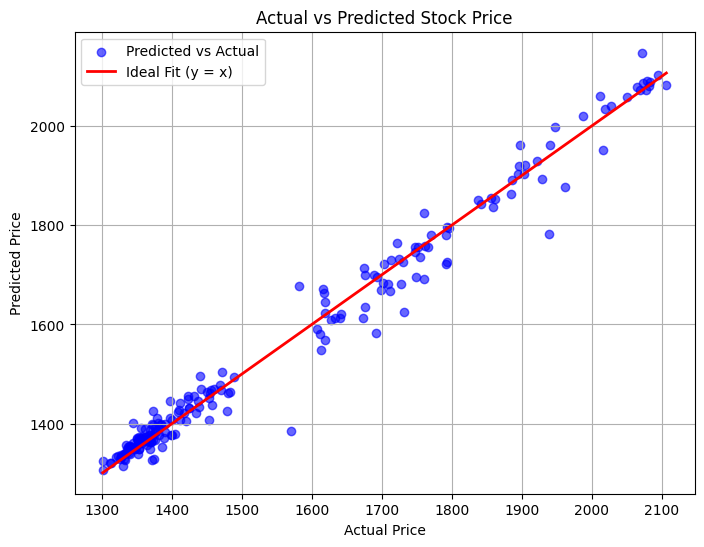

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Function to clean numeric columns (remove commas and convert to float)
def clean_numeric(column):
    return column.replace({',': ''}, regex=True).astype(float)

def load_data(file_path):
    data = pd.read_csv(file_path)
    # Keep only relevant columns
    data = data[['Open', 'Price']]
    data['Open'] = clean_numeric(data['Open'])
    data['Price'] = clean_numeric(data['Price'])
    # Drop missing values
    data = data.dropna()
    return data

# Split features and target
def prepare_features(data):
    X = data[['Open']]  # Feature
    y = data['Price']   # Target
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
def train_linear_regression(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    return reg

if __name__ == "__main__":
    file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"
    data = load_data(file_path)
    print("Rows after cleaning:", len(data))
    X_train, X_test, y_train, y_test = prepare_features(data)
    reg = train_linear_regression(X_train, y_train)

    # Predict on training data
    y_train_pred = reg.predict(X_train)
    print("Sample Predictions:", y_train_pred[:5])
    print("Coefficient:", reg.coef_[0])
    print("Intercept:", reg.intercept_)

def plot_actual_vs_predicted(y_actual, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_actual.min(), y_actual.max()],
             [y_actual.min(), y_actual.max()],
             color='red', linewidth=2, label='Ideal Fit (y = x)')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted Stock Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage after training:
y_train_pred = reg.predict(X_train)
plot_actual_vs_predicted(y_train, y_train_pred)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A2 Calculate MSE, RMSE, MAPE and R2 scores

In [5]:

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_actual, y_pred, dataset_name="Train"):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_actual, y_pred) * 100  # in %
    r2 = r2_score(y_actual, y_pred)

    print(f"🔹 {dataset_name} Metrics:")
    print(f"  MSE  : {mse:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  MAPE : {mape:.2f}%")
    print(f"  R²   : {r2:.4f}\n")
    return mse, rmse, mape, r2

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Evaluate for Train and Test sets
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")


🔹 Train Metrics:
  MSE  : 1113.3678
  RMSE : 33.3672
  MAPE : 1.37%
  R²   : 0.9802

🔹 Test Metrics:
  MSE  : 1612.1534
  RMSE : 40.1516
  MAPE : 1.50%
  R²   : 0.9760



(1612.1534057676402,
 np.float64(40.15163017571815),
 1.4980253036840228,
 0.9759688228170299)

A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

🔹 Train Metrics:
  MSE  : 93.1887
  RMSE : 9.6534
  MAPE : 0.45%
  R²   : 0.9983

🔹 Test Metrics:
  MSE  : 180.7180
  RMSE : 13.4431
  MAPE : 0.52%
  R²   : 0.9973



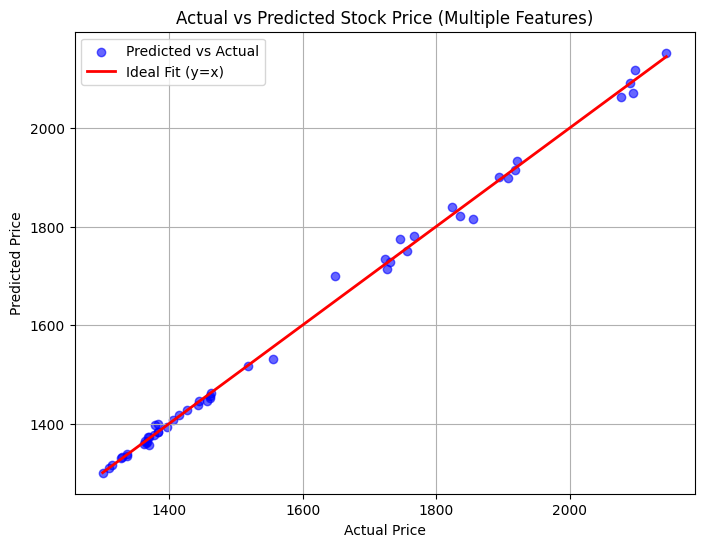

Feature Coefficients: {'Open': np.float64(-0.567800649392332), 'High': np.float64(0.9105816154163184), 'Low': np.float64(0.6568721146560317), 'Volume': np.float64(-2.372671505601609e-06)}
Intercept: -4.45517808425393


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Function to clean numeric columns
def clean_numeric(column):
    return column.replace({',': '', 'K': 'e3', 'M': 'e6'}, regex=True).astype(float)

# Load and preprocess dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    # Keep only numeric features
    data = data[['Open', 'High', 'Low', 'Volume', 'Price']]
    # Clean numeric columns
    data['Open'] = clean_numeric(data['Open'])
    data['High'] = clean_numeric(data['High'])
    data['Low'] = clean_numeric(data['Low'])
    data['Volume'] = clean_numeric(data['Volume'])
    data['Price'] = clean_numeric(data['Price'])
    # Drop missing values
    data = data.dropna()
    return data

# Prepare features and target
def prepare_features(data):
    X = data[['Open', 'High', 'Low', 'Volume']]  # Multiple features
    y = data['Price']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
def train_linear_regression(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    return reg

# Evaluate metrics
def evaluate_model(y_actual, y_pred, dataset_name="Dataset"):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_actual, y_pred) * 100
    r2 = r2_score(y_actual, y_pred)

    print(f"🔹 {dataset_name} Metrics:")
    print(f"  MSE  : {mse:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  MAPE : {mape:.2f}%")
    print(f"  R²   : {r2:.4f}\n")
    return mse, rmse, mape, r2

# Main Execution
file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"
data = load_data(file_path)
X_train, X_test, y_train, y_test = prepare_features(data)
reg = train_linear_regression(X_train, y_train)

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Evaluate
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

# Plot Actual vs Predicted for Test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Ideal Fit (y=x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Stock Price (Multiple Features)")
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients for interpretability
print("Feature Coefficients:", dict(zip(['Open', 'High', 'Low', 'Volume'], reg.coef_)))
print("Intercept:", reg.intercept_)


A4. K means Clsutering

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    return pd.read_csv(file_path)

def clean_numeric_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            # Remove commas, %, and spaces
            df[col] = df[col].str.replace(',', '', regex=False).str.strip()
            df[col] = df[col].str.replace('%', '', regex=False)

            # Convert K/M in Volume
            if col.lower() == "volume":
                def convert_volume(v):
                    if pd.isna(v):
                        return None
                    if v.endswith('M'):
                        return float(v[:-1]) * 1_000_000
                    elif v.endswith('K'):
                        return float(v[:-1]) * 1_000
                    else:
                        return float(v)
                df[col] = df[col].apply(convert_volume)
    return df

def preprocess_data(df, drop_cols):
    # Drop unwanted columns (like Date, Month, Day, Chg%)
    df_clean = df.drop(columns=drop_cols, errors='ignore')

    # Drop any columns that are fully NaN
    df_clean = df_clean.dropna(axis=1, how='all')

    # Clean numeric values
    df_clean = clean_numeric_columns(df_clean)

    # Convert everything to numeric
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Drop rows with NaN in any column
    df_clean = df_clean.dropna(how='any')

    if df_clean.empty:
        raise ValueError("No rows left after preprocessing")

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean)
    return X_scaled, df_clean


def perform_kmeans(X, n_clusters=2, random_state=0):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto")
    kmeans.fit(X)
    return kmeans

def main():
    file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"

    df = load_data(file_path)
    drop_columns = ['Date', 'Month', 'Day', 'Chg%']

    X_scaled, df_clean = preprocess_data(df, drop_columns)

    kmeans = perform_kmeans(X_scaled, n_clusters=2)

    print("Cluster Labels:\n", kmeans.labels_)
    print("\nCluster Centers:\n", kmeans.cluster_centers_)

    df_clean['Cluster'] = kmeans.labels_
    print("\nData with Cluster Labels:\n", df_clean.head())

if __name__ == "__main__":
    main()


Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Cluster Centers:
 [[ 1.13692046  1.13146693  1.13909997  1.13036336  0.3011    ]
 [-0.71336186 -0.70994004 -0.7147294  -0.7092476  -0.18892549]]

Data with Cluster Labels:
      Price     Open     High      Low     Volume  Cluster
0  2081.85  2092.00  2126.90  2065.05  1670000.0        0
1  2077.75  2084.00  2112.45  2068.40   707730.0        0
2  2068.85  2084.35  2088.50  2053.10   475820.0        0
3  2072.95  2098.00  2098.00  2066.00   541510.0        0
4  2078.25  2

A5 Calculation of Silhuotte, CH and DB scores for A4

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def main():
    file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"

    df = load_data(file_path)
    drop_columns = ['Date', 'Month', 'Day', 'Chg%']

    X_scaled, df_clean = preprocess_data(df, drop_columns)

    # Fit KMeans
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_scaled)

    # Add cluster labels
    df_clean['Cluster'] = kmeans.labels_

    # === Clustering metrics ===
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    db_score = davies_bouldin_score(X_scaled, kmeans.labels_)

    print("\nSilhouette Score:", sil_score)
    print("Calinski-Harabasz Score:", ch_score)
    print("Davies-Bouldin Index:", db_score)

if __name__ == "__main__":
    main()



Silhouette Score: 0.6469881411792563
Calinski-Harabasz Score: 473.9786668868106
Davies-Bouldin Index: 0.5621127002251322


A6. K means for diffreent values of k

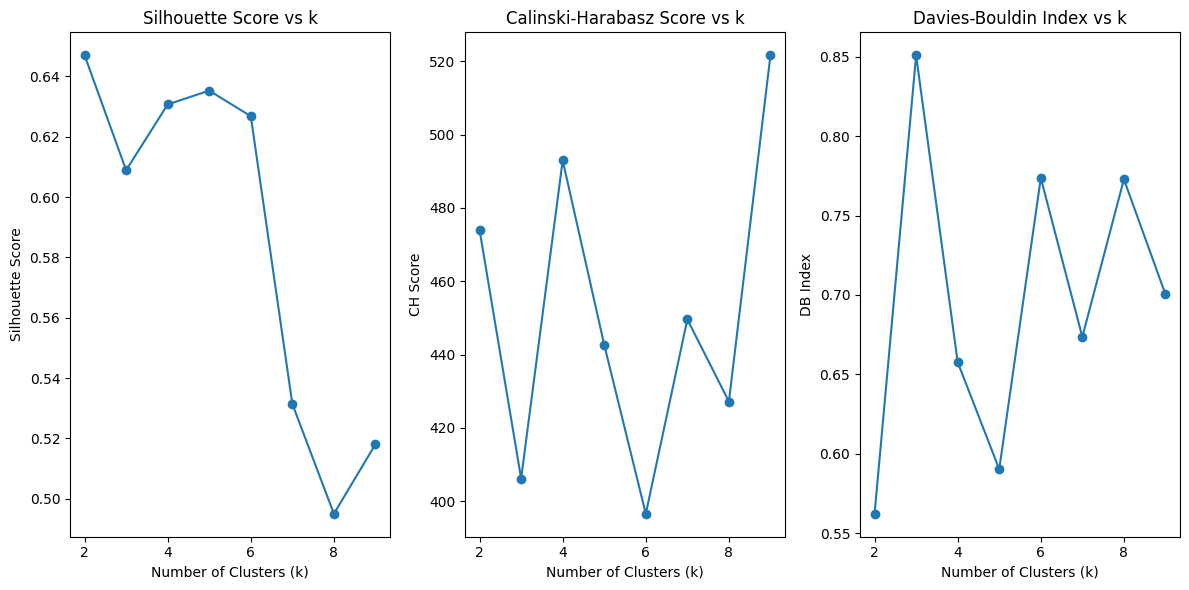

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ===== Step 1: Load data =====
def load_data(file_path):
    return pd.read_csv(file_path)

# ===== Step 2: Clean numeric-like strings =====
def clean_numeric_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace(',', '', regex=False).str.strip()
            df[col] = df[col].str.replace('%', '', regex=False)
            if col.lower() == "volume":
                def convert_volume(v):
                    if pd.isna(v):
                        return None
                    if v.endswith('M'):
                        return float(v[:-1]) * 1_000_000
                    elif v.endswith('K'):
                        return float(v[:-1]) * 1_000
                    else:
                        return float(v)
                df[col] = df[col].apply(convert_volume)
    return df

# ===== Step 3: Preprocess =====
def preprocess_data(df, drop_cols):
    df_clean = df.drop(columns=drop_cols, errors='ignore')
    df_clean = df_clean.dropna(axis=1, how='all')  # Remove empty columns
    df_clean = clean_numeric_columns(df_clean)
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean = df_clean.dropna(how='any')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean)
    return X_scaled, df_clean

# ===== Step 4: Evaluate for different k =====
def evaluate_kmeans(X, k_values):
    sil_scores, ch_scores, db_scores = [], [], []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))
    return sil_scores, ch_scores, db_scores

# ===== Step 5: Plot results =====
def plot_scores(k_values, sil_scores, ch_scores, db_scores):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.plot(k_values, sil_scores, marker='o')
    plt.title("Silhouette Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")

    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o')
    plt.title("Calinski-Harabasz Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("CH Score")

    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_scores, marker='o')
    plt.title("Davies-Bouldin Index vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("DB Index")

    plt.tight_layout()
    plt.show()

# ===== Step 6: Main =====
def main():
    file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"
    df = load_data(file_path)
    drop_columns = ['Date', 'Month', 'Day', 'Chg%']
    X_scaled, _ = preprocess_data(df, drop_columns)

    k_values = range(2, 10)  # Try k from 2 to 9
    sil_scores, ch_scores, db_scores = evaluate_kmeans(X_scaled, k_values)
    plot_scores(k_values, sil_scores, ch_scores, db_scores)

if __name__ == "__main__":
    main()


A7 optimal value of k for k means clustering using elbow plot

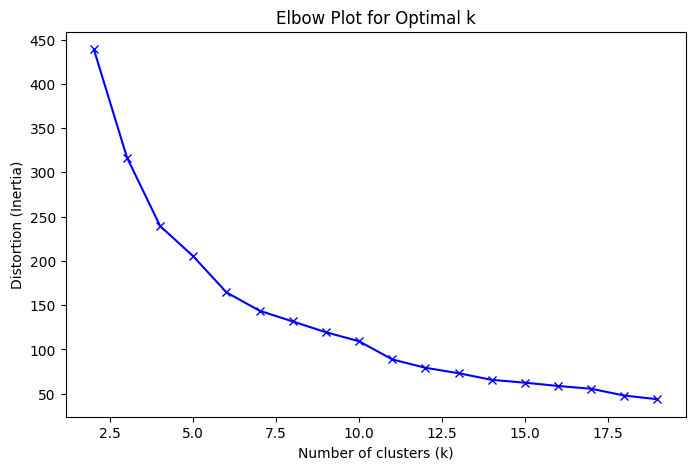

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Step 1: Convert numeric-looking columns to numbers
numeric_cols = ["Price", "Open", "High", "Low", "Volume", "Chg%"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('%', ''), errors="coerce")

# Step 2: Drop rows with all NaN in these columns
df = df.dropna(subset=numeric_cols, how="all")

# Step 3: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(df[numeric_cols].fillna(0))  # fill NaNs with 0 or mean

# Step 4: Elbow Method
distortions = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Plot for Optimal k")
plt.show()
